In [5]:
import sys
import pandas as pd
import numpy as np
import math
import csv
from matplotlib import pyplot as plt
sys.path.append('D:/Hanze_Groningen/STAGE/00git/non-coding-somatic-mutations-in-cancer/Anne/scripts/')
from config import get_config
# Call config
config = get_config('Anne')


In [6]:
# Read file with counts per bins for a gene
path = config['output_hj']
df = pd.read_csv(path, sep='\t')
df = df[~((df['breastCancer'] == 0) & (df['noBreastCancer'] == 0))]
df


,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows
0,chr1,11873,14409,DDX11L1,0.0,5.0,3
1,chr1,14361,19759,WASH7P,0.0,15.0,3
2,chr1,14406,29370,WASH7P,0.0,17.0,4
4,chr1,69090,70008,OR4F5,0.0,5.0,1
5,chr1,134772,140566,RP11-34P13.14,0.0,11.0,3
...,...,...,...,...,...,...,...
30518,chr22,51174256,51176567,AC000036.4,7.0,6.0,2
30519,chr22,51176651,51183727,ACR,4.0,23.0,4
30520,chr22,51195513,51238065,RPL23AP82,2.0,53.0,22
30521,chr22,51205919,51222087,RABL2B,1.0,21.0,9


In [7]:
print(len(df[(df['breastCancer'] == 0)]))
print(len(df[(df['noBreastCancer'] == 0)]))

7728
53


In [8]:
# Divide column by number of donors
df['breastCancer_div'] = df['breastCancer'] / 286
df['noBreastCancer_div'] = df['noBreastCancer'] / 1952

# The ultimately chosen fold change with +0.1
df['breastCancer_plus0.1'] = df['breastCancer_div'] + 0.1
df['noBreastCancer_plus0.1'] = df['noBreastCancer_div'] + 0.1
df['fc_plus0.1'] = df['breastCancer_plus0.1'] / df['noBreastCancer_plus0.1']
df['log2_fc_plus0.1'] = np.log2(df['fc_plus0.1'])
# Ultimately NOT chosen but still executed (+0.01 and +0.001)
df['breastCancer_plus0.01'] = df['breastCancer_div'] + 0.01
df['noBreastCancer_plus0.01'] = df['noBreastCancer_div'] + 0.01
df['fc_plus0.01'] = df['breastCancer_plus0.01'] / df['noBreastCancer_plus0.01']
df['breastCancer_plus0.001'] = df['breastCancer_div'] + 0.001
df['noBreastCancer_plus0.001'] = df['noBreastCancer_div'] + 0.001
df['fc_plus0.001'] = df['breastCancer_plus0.001'] / df['noBreastCancer_plus0.001']
df['log2_fc_plus0.01']= np.log2(df['fc_plus0.01'])
df['log2_fc_plus0.001'] = np.log2(df['fc_plus0.001'])

df

,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows,breastCancer_div,noBreastCancer_div,breastCancer_plus0.1,...,fc_plus0.1,log2_fc_plus0.1,breastCancer_plus0.01,noBreastCancer_plus0.01,fc_plus0.01,breastCancer_plus0.001,noBreastCancer_plus0.001,fc_plus0.001,log2_fc_plus0.01,log2_fc_plus0.001
0,chr1,11873,14409,DDX11L1,0.0,5.0,3,0.000000,0.002561,0.100000,...,0.975025,-0.036489,0.010000,0.012561,0.796085,0.001000,0.003561,0.280783,-0.329006,-1.832475
1,chr1,14361,19759,WASH7P,0.0,15.0,3,0.000000,0.007684,0.100000,...,0.928639,-0.106810,0.010000,0.017684,0.565469,0.001000,0.008684,0.115149,-0.822479,-3.118431
2,chr1,14406,29370,WASH7P,0.0,17.0,4,0.000000,0.008709,0.100000,...,0.919887,-0.120472,0.010000,0.018709,0.534502,0.001000,0.009709,0.102997,-0.903734,-3.279325
4,chr1,69090,70008,OR4F5,0.0,5.0,1,0.000000,0.002561,0.100000,...,0.975025,-0.036489,0.010000,0.012561,0.796085,0.001000,0.003561,0.280783,-0.329006,-1.832475
5,chr1,134772,140566,RP11-34P13.14,0.0,11.0,3,0.000000,0.005635,0.100000,...,0.946654,-0.079091,0.010000,0.015635,0.639581,0.001000,0.006635,0.150710,-0.644802,-2.730150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,chr22,51174256,51176567,AC000036.4,7.0,6.0,2,0.024476,0.003074,0.124476,...,1.207635,0.272185,0.034476,0.013074,2.636999,0.025476,0.004074,6.253549,1.398897,2.644675
30519,chr22,51176651,51183727,ACR,4.0,23.0,4,0.013986,0.011783,0.113986,...,1.019710,0.028159,0.023986,0.021783,1.101145,0.014986,0.012783,1.172359,0.139005,0.229414
30520,chr22,51195513,51238065,RPL23AP82,2.0,53.0,22,0.006993,0.027152,0.106993,...,0.841460,-0.249034,0.016993,0.037152,0.457396,0.007993,0.028152,0.283927,-1.128485,-1.816409
30521,chr22,51205919,51222087,RABL2B,1.0,21.0,9,0.003497,0.010758,0.103497,...,0.934437,-0.097831,0.013497,0.020758,0.650177,0.004497,0.011758,0.382414,-0.621095,-1.386791


In [9]:
print(min(df['noBreastCancer_div']))
print(max(df['noBreastCancer_div']))

print(min(df['breastCancer_div']))
print(max(df['breastCancer_div']))

0.0
7.743852459016393
0.0
2.4545454545454546


(0.0, 750.0, 0.0, 20000.0)

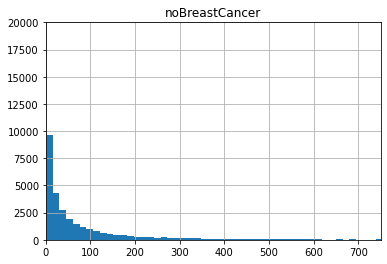

In [10]:
df.hist(column='noBreastCancer',bins=1000)
plt.axis([0, 750, 0, 20000])

(0.0, 100.0, 0.0, 20000.0)

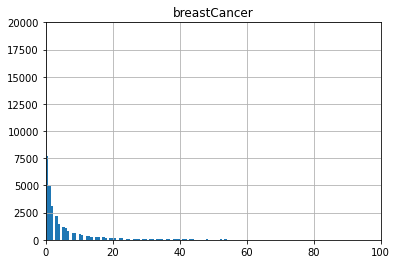

In [11]:
df.hist(column='breastCancer',bins=1000)
plt.axis([0, 100, 0, 20000])


In [12]:
# Read COSMIC CGC file
path = config['COSMIC_CGC']
df_cosmic = pd.read_csv(path, sep=';')
cosmic_genes = list(df_cosmic['Gene Symbol'])
tumor_types = list(df_cosmic['Tumour Types(Somatic)'])

In [14]:
# Compare genes from df with the COSMIC genes
gene_list = list(df['symbol'])
in_cosmic = list()
for gene in gene_list:
    if gene in cosmic_genes:
        in_cosmic.append(True)
    else:
        in_cosmic.append(False)
df['cosmic_gene'] = in_cosmic
df

,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows,breastCancer_div,noBreastCancer_div,breastCancer_plus0.1,...,log2_fc_plus0.1,breastCancer_plus0.01,noBreastCancer_plus0.01,fc_plus0.01,breastCancer_plus0.001,noBreastCancer_plus0.001,fc_plus0.001,log2_fc_plus0.01,log2_fc_plus0.001,cosmic_gene
0,chr1,11873,14409,DDX11L1,0.0,5.0,3,0.000000,0.002561,0.100000,...,-0.036489,0.010000,0.012561,0.796085,0.001000,0.003561,0.280783,-0.329006,-1.832475,False
1,chr1,14361,19759,WASH7P,0.0,15.0,3,0.000000,0.007684,0.100000,...,-0.106810,0.010000,0.017684,0.565469,0.001000,0.008684,0.115149,-0.822479,-3.118431,False
2,chr1,14406,29370,WASH7P,0.0,17.0,4,0.000000,0.008709,0.100000,...,-0.120472,0.010000,0.018709,0.534502,0.001000,0.009709,0.102997,-0.903734,-3.279325,False
4,chr1,69090,70008,OR4F5,0.0,5.0,1,0.000000,0.002561,0.100000,...,-0.036489,0.010000,0.012561,0.796085,0.001000,0.003561,0.280783,-0.329006,-1.832475,False
5,chr1,134772,140566,RP11-34P13.14,0.0,11.0,3,0.000000,0.005635,0.100000,...,-0.079091,0.010000,0.015635,0.639581,0.001000,0.006635,0.150710,-0.644802,-2.730150,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,chr22,51174256,51176567,AC000036.4,7.0,6.0,2,0.024476,0.003074,0.124476,...,0.272185,0.034476,0.013074,2.636999,0.025476,0.004074,6.253549,1.398897,2.644675,False
30519,chr22,51176651,51183727,ACR,4.0,23.0,4,0.013986,0.011783,0.113986,...,0.028159,0.023986,0.021783,1.101145,0.014986,0.012783,1.172359,0.139005,0.229414,False
30520,chr22,51195513,51238065,RPL23AP82,2.0,53.0,22,0.006993,0.027152,0.106993,...,-0.249034,0.016993,0.037152,0.457396,0.007993,0.028152,0.283927,-1.128485,-1.816409,False
30521,chr22,51205919,51222087,RABL2B,1.0,21.0,9,0.003497,0.010758,0.103497,...,-0.097831,0.013497,0.020758,0.650177,0.004497,0.011758,0.382414,-0.621095,-1.386791,False


In [15]:
# Save to file
df.to_csv(f"{config['save_output']}.tsv", sep='\t', encoding='utf-8', index=False)

In [16]:

df = df.sort_values('log2_fc_plus0.1')

In [17]:
df.to_csv(f"{config['save_output']}_sort.tsv", sep='\t', encoding='utf-8', index=False)

df.head(20).to_csv(f"{config['save_output']}_sort_head.tsv", sep='\t', encoding='utf-8', index=False)


df.tail(20).to_csv(f"{config['save_output']}_sort_tail.tsv", sep='\t', encoding='utf-8', index=False)

In [18]:
df_true = df[df['cosmic_gene'] == True ]

df_true.head(20).to_csv(f"{config['save_output']}_sort_head_true.tsv", sep='\t', encoding='utf-8', index=False)

df_true.tail(20).to_csv(f"{config['save_output']}_sort_tail_true.tsv", sep='\t', encoding='utf-8', index=False)
df_true

,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows,breastCancer_div,noBreastCancer_div,breastCancer_plus0.1,...,log2_fc_plus0.1,breastCancer_plus0.01,noBreastCancer_plus0.01,fc_plus0.01,breastCancer_plus0.001,noBreastCancer_plus0.001,fc_plus0.001,log2_fc_plus0.01,log2_fc_plus0.001,cosmic_gene
20164,chr13,35516423,36246874,NBEA,73.0,2912.0,364,0.255245,1.491803,0.355245,...,-2.163777,0.265245,1.501803,0.176618,0.256245,1.492803,0.171653,-2.501300,-2.542430,True
12645,chr8,113235158,114449242,CSMD3,309.0,9356.0,607,1.080420,4.793033,1.180420,...,-2.051429,1.090420,4.803033,0.227027,1.081420,4.794033,0.225576,-2.139062,-2.148313,True
7488,chr5,10971951,11904110,CTNND2,162.0,4716.0,467,0.566434,2.415984,0.666434,...,-1.916590,0.576434,2.425984,0.237608,0.567434,2.416984,0.234769,-2.073344,-2.090684,True
4454,chr2,212240441,213403352,ERBB4,237.0,6484.0,582,0.828671,3.321721,0.928671,...,-1.881482,0.838671,3.331721,0.251723,0.829671,3.322721,0.249696,-1.990090,-2.001753,True
5457,chr3,89156673,89531284,EPHA3,88.0,2601.0,187,0.307692,1.332480,0.407692,...,-1.812962,0.317692,1.342480,0.236646,0.308692,1.333480,0.231494,-2.079198,-2.110954,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24850,chr17,7571719,7590868,TP53,67.0,360.0,11,0.234266,0.184426,0.334266,...,0.232941,0.244266,0.194426,1.256341,0.235266,0.185426,1.268783,0.329229,0.343446,True
15683,chr10,8096666,8117164,GATA3,22.0,92.0,11,0.076923,0.047131,0.176923,...,0.266020,0.086923,0.057131,1.521466,0.077923,0.048131,1.618974,0.605462,0.695080,True
20904,chr14,38058756,38064325,FOXA1,11.0,26.0,3,0.038462,0.013320,0.138462,...,0.289087,0.048462,0.023320,2.078140,0.039462,0.014320,2.755757,1.055293,1.462449,True
25500,chr17,38465422,38513895,RARA,19.0,68.0,21,0.066434,0.034836,0.166434,...,0.303740,0.076434,0.044836,1.704734,0.067434,0.035836,1.881723,0.769547,0.912055,True
